# Assignment # 1 : Low-cost Sensor.
## Data Science 450

Design a simple, low-cost sensor that can distinguish between red wine and white wine.

- What is the percentage of correct classification results (using all attributes)?
    - 0.9336188
- What is the percentage of correct classification results (using a subset of the attributes)?
    - 0.8843683
- What is the AUC of your model?
    - Area under the curve: 0.9337
    - This model is based on the six attributes defined in the assignment.
- What is the best AUC that you can achieve?
    - This is when I have taken all the attributes, one would assume that its overfitting as all the attributes have been used.
    - Area under the curve: 0.9564
- Which are the the minimum number of attributes? Why?
    - One, I can only use Chlorides and get an AUC of 0.9005 

## About the data set

In the original form of this dataset, two datasets were created, using red and white wine samples. Here, tese two datasets have been combined into one dataset. The inputs include objective tests (e.g. PH values) and the output is based on sensory data (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent).
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

- **Source**:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553.

## Load & examine the data set.

The function shown in the cell below loads the data from the .arff file. 
Execute the code in this cell to load the data into your notebook. Make sure you have the **.arff file** in your working directory!.

In [1]:
rm(list=ls())
# Clear Console:
cat("\014")
# Set repeatable random seed.
set.seed(123)
#Load the dataset.
read.wine = function(file = 'RedWhiteWine.arff'){
  ## Read the arff file
  library(foreign)
  wine <- read.arff(file)
  wine[complete.cases(wine), ]
}

## Partition the Data Set.

Following function splits the wine dataset into test and training data sets, with exactly 30% going to test and 70% going to training data set.

In [2]:
# Partition the data into test and training data sets.
PartitionExact = function(dataSet, fractionOfTest = 0.3)
{
  #browser()
  random <-runif(nrow(dataSet))
  quant <- quantile(random,fractionOfTest)
  testFlag <- random <= quant
  testingData <- dataSet[testFlag, ]
  trainingData <- dataSet[!testFlag, ]
  dataSetSplit <- list(trainingData=trainingData, testingData=testingData)
}

## Load and cleanse the file.
I am now calling the function "read.wine" to load the arff file and then going onto rename few columns so as to remove the blank space with a period so as to use these columns in the forumla for the decision tree modeling.


In [3]:
wine = read.wine()
colnames(wine)[1] <- "fixed.acidity"
colnames(wine)[2] <- "volatile.acidity"
colnames(wine)[3] <- "citric.acid"
colnames(wine)[4] <- "residual.sugar"
colnames(wine)[6] <- "free.sulfur.dioxide"
colnames(wine)[7] <- "total.sulfur.dioxide"

## Check the structure of the data set.
Check the structure of the data set.

In [4]:
#Check out the structure of the cleansed object.
str(wine)

'data.frame':	6497 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 10 7.8 6.9 6.8 6.2 7.7 6.6 7.5 6.2 ...
 $ volatile.acidity    : num  0.29 0.41 0.26 0.32 0.37 0.25 0.27 0.44 0.18 0.22 ...
 $ citric.acid         : num  0.5 0.45 0.27 0.3 0.28 0.44 0.49 0.15 0.39 0.27 ...
 $ residual.sugar      : num  1.8 6.2 1.9 1.8 1.9 15.8 1.8 2.1 1.9 1.5 ...
 $ chlorides           : num  0.042 0.071 0.051 0.036 0.024 0.057 0.041 0.076 0.054 0.064 ...
 $ free.sulfur.dioxide : num  35 6 52 28 64 39 23 22 23 20 ...
 $ total.sulfur.dioxide: num  127 14 195 117 106 167 86 53 91 132 ...
 $ density             : num  0.994 0.997 0.993 0.993 0.99 ...
 $ pH                  : num  3.45 3.21 3.23 3.24 3.45 3.14 3.16 3.32 3.27 3.22 ...
 $ sulphates           : num  0.5 0.49 0.5 0.48 0.6 0.51 0.42 0.62 0.45 0.46 ...
 $ alcohol             : num  10.2 11.8 10.9 11 12.6 9.2 12.5 9.3 10.3 9.2 ...
 $ R/W                 : Factor w/ 2 levels "R","W": 2 1 2 2 2 2 2 1 2 2 ...
 $ quality             : num  7 7

## Adding new numeric attribute based on R/W
This column is being added for training the model. All columns with 'W' will be stored as 0 and 'R' as 1.

In [5]:
#Adding a new numerica attribute based on the R/W column.
wine$kind <- as.numeric(wine$`R/W` == "R")
str(wine)

'data.frame':	6497 obs. of  14 variables:
 $ fixed.acidity       : num  7.4 10 7.8 6.9 6.8 6.2 7.7 6.6 7.5 6.2 ...
 $ volatile.acidity    : num  0.29 0.41 0.26 0.32 0.37 0.25 0.27 0.44 0.18 0.22 ...
 $ citric.acid         : num  0.5 0.45 0.27 0.3 0.28 0.44 0.49 0.15 0.39 0.27 ...
 $ residual.sugar      : num  1.8 6.2 1.9 1.8 1.9 15.8 1.8 2.1 1.9 1.5 ...
 $ chlorides           : num  0.042 0.071 0.051 0.036 0.024 0.057 0.041 0.076 0.054 0.064 ...
 $ free.sulfur.dioxide : num  35 6 52 28 64 39 23 22 23 20 ...
 $ total.sulfur.dioxide: num  127 14 195 117 106 167 86 53 91 132 ...
 $ density             : num  0.994 0.997 0.993 0.993 0.99 ...
 $ pH                  : num  3.45 3.21 3.23 3.24 3.45 3.14 3.16 3.32 3.27 3.22 ...
 $ sulphates           : num  0.5 0.49 0.5 0.48 0.6 0.51 0.42 0.62 0.45 0.46 ...
 $ alcohol             : num  10.2 11.8 10.9 11 12.6 9.2 12.5 9.3 10.3 9.2 ...
 $ R/W                 : Factor w/ 2 levels "R","W": 2 1 2 2 2 2 2 1 2 2 ...
 $ quality             : num  7 7

## Data Set Head and Tail.
- Check the head and tail of the dataset to get a sense of the data.

In [6]:
head(wine)
tail(wine)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,R/W,quality,kind
7.4,0.29,0.50,1.8,0.042,35,127,0.99370,3.45,0.50,10.2,W,7,0
10.0,0.41,0.45,6.2,0.071,6,14,0.99702,3.21,0.49,11.8,R,7,1
7.8,0.26,0.27,1.9,0.051,52,195,0.99280,3.23,0.50,10.9,W,6,0
6.9,0.32,0.30,1.8,0.036,28,117,0.99269,3.24,0.48,11.0,W,6,0
6.8,0.37,0.28,1.9,0.024,64,106,0.98993,3.45,0.60,12.6,W,8,0
6.2,0.25,0.44,15.8,0.057,39,167,0.99804,3.14,0.51,9.2,W,5,0


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,R/W,quality,kind
6492,8.1,0.27,0.41,1.5,0.033,11,63,0.99080,2.99,0.56,12.0,W,5,0
6493,5.6,0.49,0.13,4.5,0.039,17,116,0.99070,3.42,0.90,13.7,W,7,0
6494,7.9,0.22,0.49,3.8,0.042,26,105,0.99300,3.10,0.39,10.5,W,5,0
6495,5.5,0.17,0.23,2.9,0.039,10,108,0.99243,3.28,0.50,10.0,W,5,0
6496,7.8,0.60,0.26,2.0,0.080,31,131,0.99622,3.21,0.52,9.9,R,5,1
6497,8.1,0.50,0.47,1.1,0.037,23,126,0.99380,3.21,0.42,10.9,W,5,0


## Remove Columns
Removing R/W and Quality columns as they would not be required for the modelling exercise.

In [7]:
# Remove R/W column
wine$`R/W` <- NULL
# Remove Quality column
wine$quality <- NULL

### Summary statistics
All the columns are num or integer hence we can calculate the summary of the complete dataset.

Execute the code in the cell below and note the result.

In [8]:
#All the columns are num or integer hence we can calculate the summary of the complete dataset.
lapply(wine, summary)

$fixed.acidity
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.800   6.400   7.000   7.215   7.700  15.900 

$volatile.acidity
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0800  0.2300  0.2900  0.3397  0.4000  1.5800 

$citric.acid
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2500  0.3100  0.3186  0.3900  1.6600 

$residual.sugar
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.600   1.800   3.000   5.445   8.100  65.800 

$chlorides
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00900 0.03800 0.04700 0.05603 0.06500 0.61100 

$free.sulfur.dioxide
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   17.00   29.00   30.53   41.00  289.00 

$total.sulfur.dioxide
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    6.0    77.0   118.0   115.7   156.0   440.0 

$density
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9871  0.9923  0.9949  0.9947  0.9970  1.0390 

$pH
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.720   3.110   3.210   3.21

# Data Exploration. 
Create the histrogram of all the numeric attributes. R/W has been been treated as id variables, we can instead see the histogram of "Kind" to get a sense of numbers of R & W.

Warning message:
"package 'reshape2' was built under R version 3.3.3"Warning message:
"package 'ggplot2' was built under R version 3.3.3"No id variables; using all as measure variables


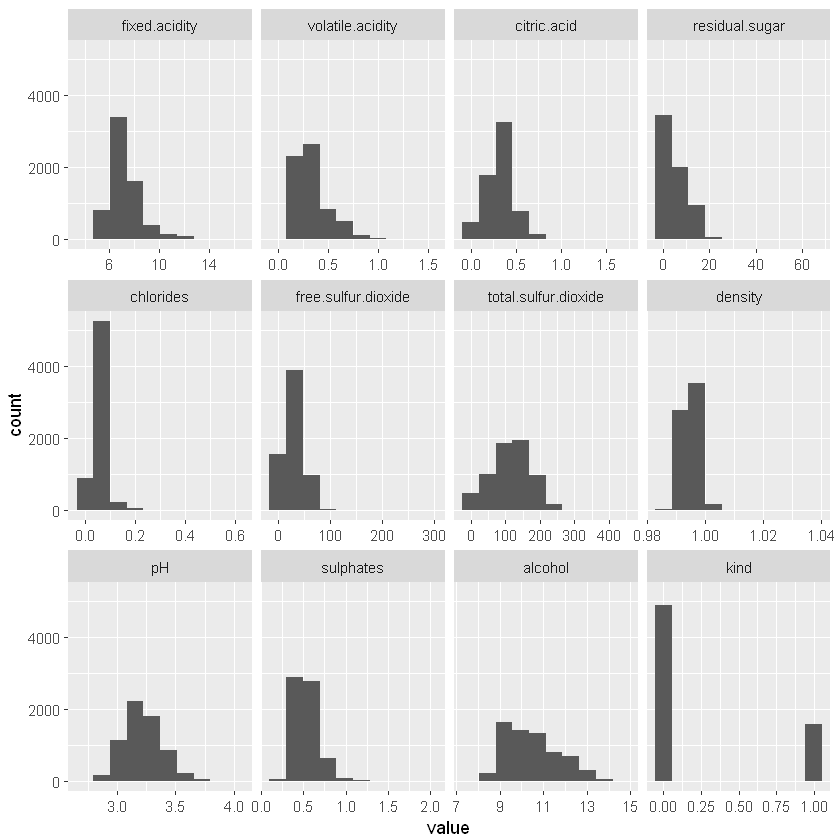

In [9]:
library(reshape2)
library(ggplot2)

ggplot(data = melt(wine), mapping = aes(x = value)) + 
  geom_histogram(bins = 10) + facet_wrap(~variable, scales = 'free_x')

### Partition the dataset for the Model.

I am now going to call the PartitionExact function to split the dataset into training and test dataset.

In [10]:
WineDataset = PartitionExact(wine)
TestWine <- WineDataset$testingData
TrainWine <-WineDataset$trainingData

## Analyse the count and header portion of partitioned datasets

In [11]:
nrow(TrainWine)
head(TrainWine)
nrow(TestWine)
head(TestWine)

[1] 4548

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,kind
2,10.0,0.41,0.45,6.2,0.071,6,14,0.99702,3.21,0.49,11.8,1
3,7.8,0.26,0.27,1.9,0.051,52,195,0.99280,3.23,0.50,10.9,0
4,6.9,0.32,0.30,1.8,0.036,28,117,0.99269,3.24,0.48,11.0,0
5,6.8,0.37,0.28,1.9,0.024,64,106,0.98993,3.45,0.60,12.6,0
7,7.7,0.27,0.49,1.8,0.041,23,86,0.99140,3.16,0.42,12.5,0
8,6.6,0.44,0.15,2.1,0.076,22,53,0.99570,3.32,0.62,9.3,1


[1] 1949

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,kind
1,7.4,0.29,0.50,1.8,0.042,35,127,0.99370,3.45,0.50,10.2,0
6,6.2,0.25,0.44,15.8,0.057,39,167,0.99804,3.14,0.51,9.2,0
15,7.3,0.30,0.74,13.5,0.039,46,165,0.99820,3.02,0.40,8.7,0
17,7.0,0.20,0.37,2.0,0.030,26,136,0.99320,3.28,0.61,10.2,0
18,6.3,0.35,0.30,5.7,0.035,8,97,0.99270,3.27,0.41,11.0,0
29,8.4,0.29,0.29,1.1,0.032,4,55,0.99080,2.91,0.32,11.4,0


## Create Decision Tree Model.
- Create a decision tree model based on all the attributes.
- Create a decision tree model based on the forumula on six attributes, this model will be trained on the training data set.

In [12]:
library(rpart)
formulaAll <- kind ~ .
formula <- kind ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + chlorides + density
formulaOne <- kind ~ chlorides
winetreeAll <- rpart(formula = formulaAll, data = TrainWine,method="class")
winetreeOne <- rpart(formula = formulaOne, data = TrainWine,method="class")
winetree <- rpart(formula = formula, data = TrainWine,method="class")

Warning message:
"package 'rpart' was built under R version 3.3.3"

## Plot tree
- Plot the tree model based on six attributes and all attributes.

Warning message:
"package 'rpart.plot' was built under R version 3.3.3"

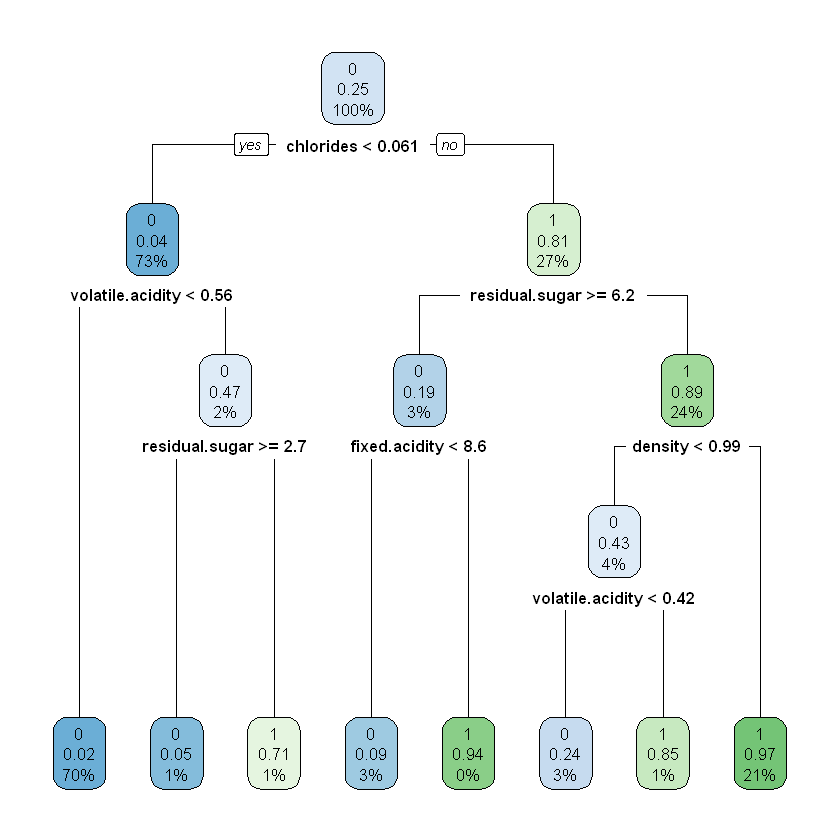

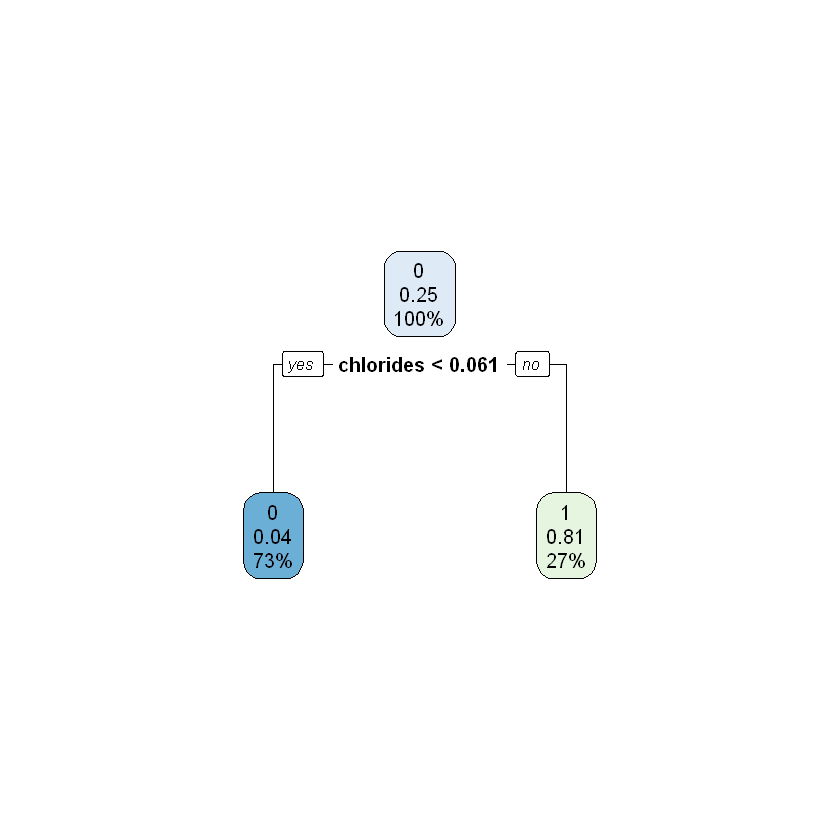

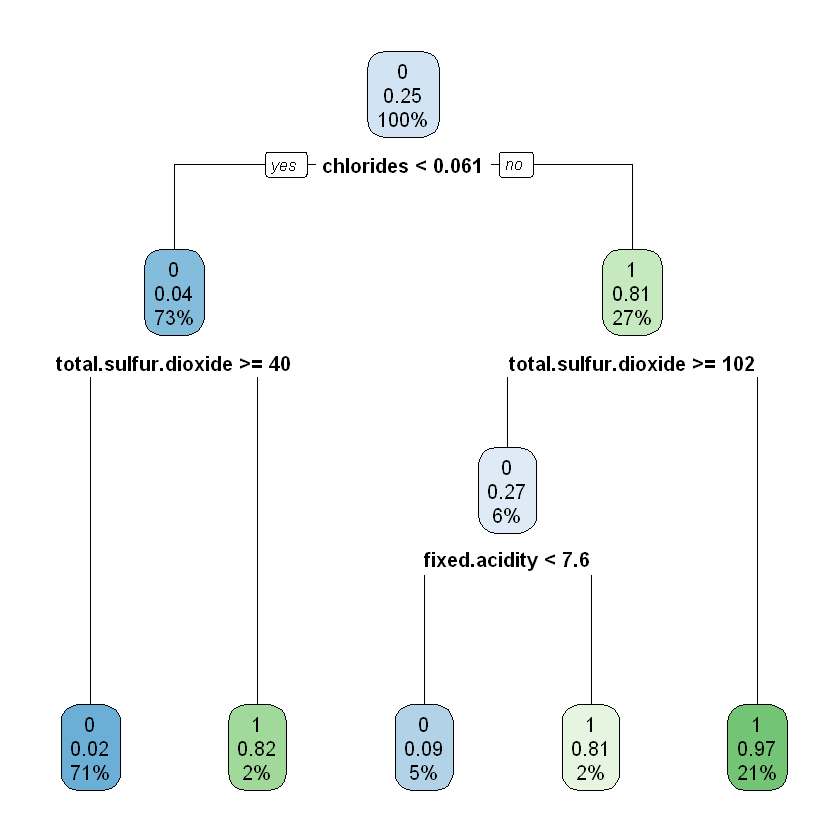

In [13]:
library("rpart.plot")
rpart.plot(winetree)
rpart.plot(winetreeOne)
rpart.plot(winetreeAll)

## Prediction based on the model
Use the model to make predictions on the test data set.

In [14]:
kindPrediction <- as.numeric(predict(winetree, newdata = TestWine, type="class"))
kindPredictionOne <- as.numeric(predict(winetreeOne, newdata = TestWine, type="class"))
kindPredictionAll <- as.numeric(predict(winetreeAll, newdata = TestWine, type="class"))

## Calculate the confusion matrix
- Cross tabulate the prediction against the 'Kind' attribute in the test dataset for model with all variables.
- Cross tabulate the prediction against the 'Kind' attribute in the test dataset for models with six variables.

In [15]:
#Calculate Confusion Matrix with six attributes.
crosstab <- table(kindPrediction, TestWine$kind)
crosstab

#Calculate Confusion Matrix for model with one attribute
crosstabOne <- table(kindPredictionOne, TestWine$kind)
crosstabOne

#Calculate Confusion Matrix for all atributes.
crosstabAll <- table(kindPredictionAll, TestWine$kind)
crosstabAll

              
kindPrediction    0    1
             1 1457   54
             2   25  413

                 
kindPredictionOne    0    1
                1 1368   57
                2  114  410

                 
kindPredictionAll    0    1
                1 1451   31
                2   31  436

## Calculate TPR and FPR.

ROC curve is a plot of TPR against FPR and the area this curve is termed as AUC.
When you add TPR+FPR it should add up to 1.

- Calculate the TPR and FPR for all attributes.
- Calculate the TPR and FPR for six attributes.

In [16]:
#Calculate Specificity (TPR)
Specificity <- function(Table.X)
{
  Specificity.X <- (Table.X[2,2])/(Table.X[1,2]+Table.X[2,2])
  return(Specificity.X)
}
#calculate FPR from Confusion MAtrix
FPR <- function(Table.X)
{
  FPR.X <- (Table.X[1,2])/(Table.X[1,2]+Table.X[2,2])
  return(FPR.X)
}
# Calculate TPR for all attributes
TPRAll <- Specificity(crosstabAll)
TPRAll
# Calculate TPR for six attributes
TPRSix <- Specificity(crosstab)
TPRSix
# Calculate TPR for one attributes
TPROne <- Specificity(crosstabOne)
TPROne
# Calculate FPR for all attributes
FPRAll <- FPR(crosstabAll)
FPRAll
# Calculate FPR for six attributes
FPRSix <- FPR(crosstab)
FPRSix
# Calculate FPR for one attributes
FPROne <- FPR(crosstabOne)
FPROne
# Total for all attributes
TotalAll <- TPRAll+FPRAll
TotalAll
# Total for six attributes
TotalSix <- TPRSix+FPRSix
TotalSix
# Total for one attributes
TotalOne <- TPROne+FPROne
TotalOne

[1] 0.9336188

[1] 0.8843683

[1] 0.8779443

[1] 0.06638116

[1] 0.1156317

[1] 0.1220557

[1] 1

[1] 1

[1] 1

## Calculate AUC
We would be using pROC package to calculate AUC 

In [17]:
#Calculate AUC for six attributes
library(pROC)
roc_obj <- roc(TestWine$kind, kindPrediction)
auc(roc_obj)

#Calculate AUC for all attributes
roc_obj_All <- roc(TestWine$kind, kindPredictionAll)
auc(roc_obj_All)

#calculate AUC for one attribute
roc_obj_One <- roc(TestWine$kind, kindPredictionOne)
auc(roc_obj_One)

Warning message:
"package 'pROC' was built under R version 3.3.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



Area under the curve: 0.9337

Area under the curve: 0.9564

Area under the curve: 0.9005